In [1]:
import pandas as pd 
import numpy as np
import up_hist as uh

In [2]:
data = pd.read_csv('data/features.csv')

In [3]:
from catboost import CatBoostRegressor

In [4]:
data.columns

Index(['Unnamed: 0', 'time', 'tavg', 'point_id', 'tavg_1', 'tavg_2', 'tavg_3',
       'tavg_4', 'tavg_5', 'tavg_6', 'tavg_7', 'lat', 'elev', 'long', 'gtopo'],
      dtype='object')

In [5]:
model = CatBoostRegressor()

In [ ]:
import datetime
data['time'] = pd.to_datetime(data['time'])

data = data[~data['tavg_1'].isna()]
data = data[~data['tavg_2'].isna()]
data = data[~data['tavg_3'].isna()]
data = data[~data['tavg_4'].isna()]
data = data[~data['tavg_5'].isna()]
data = data[~data['tavg_6'].isna()]
data = data[~data['tavg_7'].isna()]



train = data[data['time'] < datetime.datetime(2022,1,1)]

test = data[data['time'] >= datetime.datetime(2022,1,1)]

In [22]:
features = ['tavg_1', 'tavg_2', 'tavg_3',
       'tavg_4', 'tavg_5', 'tavg_6', 'tavg_7', 'lat', 'elev', 'long', 'gtopo']
target = 'tavg'
model.fit(train[features], train[target], eval_set=(test[features], test[target]), early_stopping_rounds=20)

Learning rate set to 0.213284
0:	learn: 8.9665645	test: 8.5688371	best: 8.5688371 (0)	total: 2.21s	remaining: 36m 53s
1:	learn: 7.3498100	test: 6.9775181	best: 6.9775181 (1)	total: 4.31s	remaining: 35m 52s
2:	learn: 6.1083294	test: 5.7487023	best: 5.7487023 (2)	total: 6.38s	remaining: 35m 20s
3:	learn: 5.1742888	test: 4.8164691	best: 4.8164691 (3)	total: 8.58s	remaining: 35m 35s
4:	learn: 4.4779026	test: 4.1248148	best: 4.1248148 (4)	total: 10.6s	remaining: 35m 10s
5:	learn: 3.9813357	test: 3.6418340	best: 3.6418340 (5)	total: 12.6s	remaining: 34m 50s
6:	learn: 3.6216510	test: 3.2979125	best: 3.2979125 (6)	total: 14.8s	remaining: 34m 54s
7:	learn: 3.3729424	test: 3.0578389	best: 3.0578389 (7)	total: 16.5s	remaining: 34m 2s
8:	learn: 3.2025437	test: 2.9033417	best: 2.9033417 (8)	total: 18.2s	remaining: 33m 28s
9:	learn: 3.0867766	test: 2.7982689	best: 2.7982689 (9)	total: 20.2s	remaining: 33m 19s
10:	learn: 3.0075066	test: 2.7284595	best: 2.7284595 (10)	total: 22s	remaining: 32m 56s
11:

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
def WAPE(y, y_pred):
    return np.sum(np.abs(y-y_pred))/np.sum(np.abs(y))

In [24]:
predict = model.predict(test[features])
print(mean_squared_error(test[target], predict))
print(mean_absolute_error(test[target], predict))
print(mean_absolute_percentage_error(test[target], predict))
print(WAPE(test[target], predict))

6.515831609836345
1.920673797808822
31009910530671.883
0.1961489973421617


In [ ]:
import feature_preprocessing as fp
import datetime
sample = fp.collect_train_features(weather=weather, datetime.datetime())

In [23]:
weather.data_hist = weather.data_hist.sort_values(by = ['point_id','time'])

In [24]:
len(weather.data_hist.point_id.unique())

52168

In [25]:
weather.data_places = weather.data_places[weather.data_places['geonameid'].isin(list(weather.data_hist.point_id.unique()))]

In [26]:
import datetime
weather.data_hist['time'] = pd.to_datetime(weather.data_hist['time'])
sample_data = weather.data_hist[weather.data_hist['time'] > datetime.datetime(2022,11,30)]

In [27]:
del weather.data_hist

In [28]:
sample_data = sample_data[~sample_data['tavg'].isna()]

In [29]:
sample_data

,time,tavg,point_id
20907815,2022-12-01,-14.3,451750
20907816,2022-12-02,-13.3,451750
20907817,2022-12-03,-10.4,451750
20907818,2022-12-04,-7.4,451750
20907819,2022-12-05,-9.4,451750
...,...,...,...
20906015,2022-12-27,-0.1,805908
20906016,2022-12-28,0.5,805908
20906017,2022-12-29,0.3,805908
20906018,2022-12-30,1.8,805908


In [30]:
point_ids = list(weather.data_places['geonameid'].unique())
for lag in range(7):
    sample_data[f"tavg_{lag}"] = sample_data['tavg'].shift(lag+1)
    sample_data[f"point_{lag}"] = sample_data['point_id'].shift(lag+1)
    sample_data[f"tavg_{lag}"] = sample_data.apply(lambda x: x[f"tavg_{lag}"] if x['point_id'] == x[f"point_{lag}"] else np.nan, axis = 1)

In [31]:
sample_data[['time','tavg', 'point_id'] + [f"tavg_{lag}" for lag in range(7)]]

,time,tavg,point_id,tavg_0,tavg_1,tavg_2,tavg_3,tavg_4,tavg_5,tavg_6
20907815,2022-12-01,-14.3,451750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20907816,2022-12-02,-13.3,451750,-14.3,NaN,NaN,NaN,NaN,NaN,NaN
20907817,2022-12-03,-10.4,451750,-13.3,-14.3,NaN,NaN,NaN,NaN,NaN
20907818,2022-12-04,-7.4,451750,-10.4,-13.3,-14.3,NaN,NaN,NaN,NaN
20907819,2022-12-05,-9.4,451750,-7.4,-10.4,-13.3,-14.3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
20906015,2022-12-27,-0.1,805908,0.1,1.6,2.8,2.7,0.9,-0.9,-4.8
20906016,2022-12-28,0.5,805908,-0.1,0.1,1.6,2.8,2.7,0.9,-0.9
20906017,2022-12-29,0.3,805908,0.5,-0.1,0.1,1.6,2.8,2.7,0.9
20906018,2022-12-30,1.8,805908,0.3,0.5,-0.1,0.1,1.6,2.8,2.7


,geonameid,lat,elev,long,gtopo
0,451750,57.29693,NaN,34.41848,247
1,451753,56.73452,NaN,34.92011,159
2,451755,57.27055,NaN,34.73000,184
3,451756,56.68265,NaN,34.70984,178
4,451761,56.74771,NaN,34.84792,190
...,...,...,...,...,...
52163,805902,50.89540,NaN,35.77650,167
52164,805904,50.93944,NaN,35.77500,164
52165,805906,51.21040,NaN,36.09690,179
52166,805907,50.90800,NaN,35.72030,172


In [33]:
from catboost import CatBoostRegressor as cbr
model = cbr()
sample_data = sample_data.dropna()
model.fit(X=sample_data[['point_id'] + [f"tavg_{lag}" for lag in range(7)]], y=sample_data['tavg'], verbose=True, plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.124652
0:	learn: 4.7117788	total: 118ms	remaining: 1m 58s
1:	learn: 4.3947208	total: 216ms	remaining: 1m 47s
2:	learn: 4.1313149	total: 317ms	remaining: 1m 45s
3:	learn: 3.9124539	total: 415ms	remaining: 1m 43s
4:	learn: 3.7329786	total: 508ms	remaining: 1m 41s
5:	learn: 3.5737893	total: 612ms	remaining: 1m 41s
6:	learn: 3.4466649	total: 713ms	remaining: 1m 41s
7:	learn: 3.3383455	total: 807ms	remaining: 1m 40s
8:	learn: 3.2501266	total: 901ms	remaining: 1m 39s
9:	learn: 3.1769885	total: 999ms	remaining: 1m 38s
10:	learn: 3.1153298	total: 1.09s	remaining: 1m 38s
11:	learn: 3.0641971	total: 1.18s	remaining: 1m 37s
12:	learn: 3.0151023	total: 1.28s	remaining: 1m 37s
13:	learn: 2.9738709	total: 1.38s	remaining: 1m 36s
14:	learn: 2.9332140	total: 1.48s	remaining: 1m 37s
15:	learn: 2.9001183	total: 1.58s	remaining: 1m 37s
16:	learn: 2.8694907	total: 1.68s	remaining: 1m 37s
17:	learn: 2.8459885	total: 1.78s	remaining: 1m 37s
18:	learn: 2.8273522	total: 1.86s	remaining:

In [34]:
sample_data['test'] = model.predict(sample_data[['point_id'] + [f"tavg_{lag}" for lag in range(7)]])

In [35]:
sample_data = sample_data[['point_id','test','tavg'] + [f"tavg_{lag}" for lag in range(7)]]

In [52]:
from sklearn.metrics import mean_absolute_error as mae, mean_absolute_percentage_error as mape
for_map = sample_data[sample_data['tavg']!=0]
mae( for_map['tavg'] ,for_map['test'])

0.7367120838047088

<AxesSubplot:>

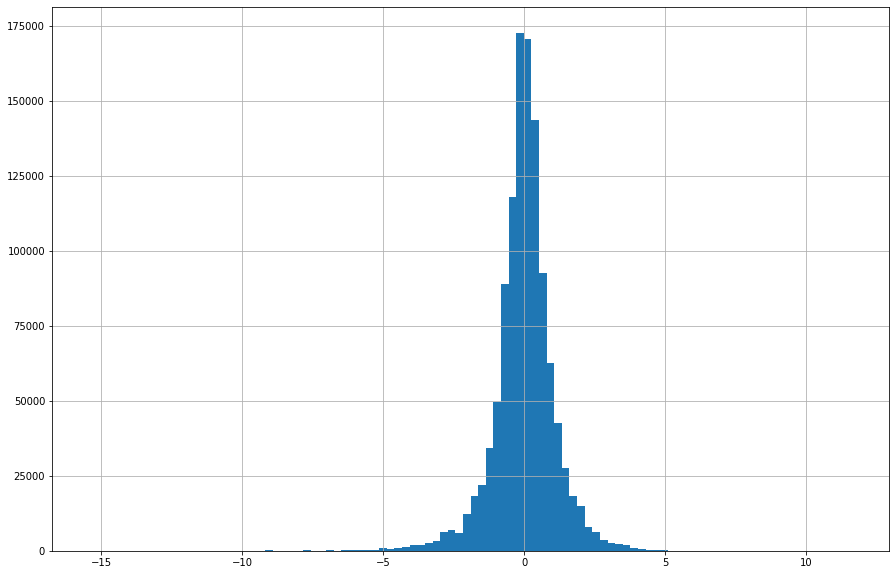

In [41]:
sample_data['bias'] = sample_data['tavg'] - sample_data['test']
sample_data['bias'].hist(bins=100, figsize=(15,10))

0.02643747987412262

In [7]:
data[['time', 'tavg', 'point_id']].to_csv('data_weather.csv', index=False)

In [19]:
data[data['country_id']==1]

,city_id,country_id,important,region_id,title_ru,area_ru,region_ru,title_ua,area_ua,region_ua,...,region_ja,title_lt,area_lt,region_lt,title_lv,area_lv,region_lv,title_cz,area_cz,region_cz
231897,14483,1,f,1121540.0,Чоя,Чойский район,Алтай,Чоя,Чойский район,Алтай,...,Алтай,Чоя,Чойский район,Алтай,Чоя,Чойский район,Алтай,Чоя,Чойский район,Алтай
232274,1121798,1,f,1121540.0,Сёйка,Чойский район,Алтай,Сёйка,Чойский район,Алтай,...,Алтай,Сёйка,Чойский район,Алтай,Сёйка,Чойский район,Алтай,Сёйка,Чойский район,Алтай
275032,1013337,1,f,1011109.0,1-й,Севский район,Брянская область,1-й,Севский район,Брянская область,...,Брянская область,1-й,Севский район,Брянская область,1-й,Севский район,Брянская область,1-й,Севский район,Брянская область
275033,1147107,1,f,1146712.0,10-й,Бузулук город,Бузулукский район,10-й,Бузулук город,Бузулукский район,...,Бузулукский район,10-й,Бузулук город,Бузулукский район,10-й,Бузулук город,Бузулукский район,10-й,Бузулук город,Бузулукский район
275034,1111069,1,f,1109098.0,1130 км,Ярский район,Удмуртская,1130 км,Ярский район,Удмуртская,...,Удмуртская,1130 км,Ярский район,Удмуртская,1130 км,Ярский район,Удмуртская,1130 км,Ярский район,Удмуртская
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385902,1048162,1,f,1045244.0,Кривицы,Сланцевский район,Ленинградская область,Кривицы,Сланцевский район,Ленинградская область,...,Ленинградская область,Кривицы,Сланцевский район,Ленинградская область,Кривицы,Сланцевский район,Ленинградская область,Кривицы,Сланцевский район,Ленинградская область
1385903,1047687,1,f,1045244.0,Крокол,Лужский район,Ленинградская область,Крокол,Лужский район,Ленинградская область,...,Ленинградская область,Крокол,Лужский район,Ленинградская область,Крокол,Лужский район,Ленинградская область,Крокол,Лужский район,Ленинградская область
1385904,1045374,1,f,1045244.0,Крутой Ручей,Бокситогорский район,Ленинградская область,Крутой Ручей,Бокситогорский район,Ленинградская область,...,Ленинградская область,Крутой Ручей,Бокситогорский район,Ленинградская область,Крутой Ручей,Бокситогорский район,Ленинградская область,Крутой Ручей,Бокситогорский район,Ленинградская область
1385905,1047688,1,f,1045244.0,Крюково,Лужский район,Ленинградская область,Крюково,Лужский район,Ленинградская область,...,Ленинградская область,Крюково,Лужский район,Ленинградская область,Крюково,Лужский район,Ленинградская область,Крюково,Лужский район,Ленинградская область


In [21]:
del data

In [16]:
data_places = data[['geonameid', 'name', 'lat', 'long', 'elev', 'gtopo']]
data_places[~data['elev'].isna()]

,geonameid,name,lat,long,elev,gtopo
1685,462074,Gora Zuberkha,42.55956,47.07746,2338.0,2324
1789,462179,Gora Zolotoy Kurgan,43.94667,43.10750,884.0,781
1994,462387,Gora Zmeyka,44.16833,43.09556,994.0,966
2934,463331,Gora Zheleznyy Kamen’,61.54626,59.85284,67.0,455
2979,463377,Gora Zheleznaya,44.13917,43.03056,851.0,833
...,...,...,...,...,...,...
365912,12470130,Volga Source,57.25129,32.46792,228.0,231
365992,12491966,Bolschaya,51.33553,82.19080,642.0,532
365996,12493116,Ostraya Sopka,51.35481,82.09393,463.0,343
366194,12501495,gora Tumara,64.05793,141.51695,1434.0,1257


In [26]:
from transliterate import translit, get_available_language_codes
text = "gora Tumara"
print(translit(text, 'ru'))
data_places['name_ru'] = data_places['name'].apply(lambda x: translit(x, 'ru'))
data_places

гора Тумара


C:\Users\shale\AppData\Local\Temp/ipykernel_14000/2343244001.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_places['name_ru'] = data_places['name'].apply(lambda x: translit(x, 'ru'))


,geonameid,name,lat,long,elev,gtopo,name_ru
0,451747,Zyabrikovo,56.84665,34.70480,NaN,204,Зыабриково
1,451748,Znamenka,56.74087,34.02323,NaN,215,Знаменка
2,451749,Zhukovo,57.26429,34.20956,NaN,237,Жуково
3,451750,Zhitovo,57.29693,34.41848,NaN,247,Житово
4,451751,Zhitnikovo,57.20064,34.57831,NaN,198,Житниково
...,...,...,...,...,...,...,...
368014,12534106,Ozero Mordov,51.46291,40.50285,NaN,99,Озеро Мордов
368015,12534107,Urochishche Sirkina Polyana,51.45017,40.52353,NaN,97,Урочишче Сиркина Полыана
368016,12534108,Log Klyuch,51.48747,40.54628,NaN,159,Лог Клыуч
368017,12534303,Kamennyye Palatki,56.84291,60.67843,NaN,278,Каменныые Палатки


In [27]:
data_places.to_csv('data_places.csv')

In [31]:


# Import Meteostat library and dependencies


# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

# Create Point for Vancouver, BC
location = Point(49.2497, -123.1193, 70)

# Get daily data for 2018
data = Daily(location, start, end)
data = data.fetch()
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2018-01-01,1.8,-0.4,4.0,0.0,0.0,NaN,8.7,0.0,1030.7,NaN
2018-01-02,1.8,-0.4,3.9,0.0,0.0,NaN,7.1,0.0,1028.5,NaN
2018-01-03,2.3,1.2,3.4,0.0,NaN,NaN,6.8,0.0,1022.5,NaN
2018-01-04,4.1,1.6,6.6,0.0,0.0,NaN,6.1,0.0,1016.7,NaN
2018-01-05,7.6,5.7,9.5,30.4,0.0,NaN,10.0,0.0,1014.5,NaN
...,...,...,...,...,...,...,...,...,...,...
2018-12-27,3.6,1.8,5.3,0.0,0.0,74.0,7.2,NaN,1027.8,NaN
2018-12-28,3.8,2.8,4.8,24.5,0.0,66.0,17.6,NaN,1025.2,NaN
2018-12-29,7.5,4.6,10.3,16.6,0.0,180.0,25.3,208.8,1013.7,NaN


In [ ]:
import time

def get_wether(point_id, start, end, point):
    data = Daily(point, start, end)
    data = data.fetch().reset_index()
    data = data.rename(columns={'index': 'time'})
    data = data[['time', 'tavg']]
    data['point_id'] = point_id
    return data

mass = []
for i in range((data_places.shape[0]//10000)):
    if ((i+1)*10000) > data.shape[0]:
        mass.append(pd.concat(list(data_places.loc[i*10000:].apply(lambda x : get_wether(x['geonameid'], datetime(2018, 1, 1), datetime(2022, 12, 31), Point(x['lat'], x['long'])), axis = 1))))
    else:
                    mass.append(pd.concat(list(data_places.loc[i*10000:(i+1)*10000].apply(lambda x : get_wether(x['geonameid'], datetime(2018, 1, 1), datetime(2022, 12, 31), Point(x['lat'], x['long'])), axis = 1))))
    time.sleep(5)
mass = pd.concat(mass)
mass

In [ ]:
mass.to_csv('historical_data.csv')